# Analysis

* There is a strong correlation between latitude and temperature. Areas are located closer to Equator have higher temperatures, and areas are located far from Equator have lower temperatures.  
* There is some correlation between humidity and latitude. The scatter plot shows that polar areas (in this example, areas that are closer to the North Pole) have only high level of humidity unlike areas on 20th latitude, where we can see areas with high and low levels of humidity.
* There is no any clear correlation between cloudiness or wind speed and latitude.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [7]:
#print(cities)
cities_df = pd.DataFrame(cities, columns=['City'])
cities_df.head()

,City
0,te anau
1,bose
2,ushuaia
3,dinguiraye
4,hai phong


In [8]:
cities_df['Latitude'] = ""
cities_df['Temperature'] = ""
cities_df['Humidity'] = ""
cities_df['Cloudiness'] = ""
cities_df['Wind Speed'] = ""

cities_df.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,te anau,,,,,
1,bose,,,,,
2,ushuaia,,,,,
3,dinguiraye,,,,,
4,hai phong,,,,,


## Perform API Calls

In [14]:
api_key = api_keys.api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

for index, row in cities_df.iterrows():

    # get restaurant type from df
    city = row['City']

    # add keyword to params dict
    params['keyword'] = city

    # assemble url and make API request
    #print(f"Retrieving Results for Index {index}: {city}.")
    response = requests.get(query_url + city).json()
    #pprint(response)
    
    try:
        print(f"Working on {city}.")
        
        cities_df.loc[index, 'Latitude'] = response['coord']['lat']
        cities_df.loc[index, 'Temperature'] = response['main']['temp']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = response['clouds']["all"]
        cities_df.loc[index, 'Wind Speed']= response['wind']['speed']
        
    except (KeyError, IndexError):
        print("Missing result... skipping.")
        
  

Working on te anau.
Working on bose.
Working on ushuaia.
Working on dinguiraye.
Working on hai phong.
Missing result... skipping.
Working on mataura.
Working on harer.
Working on cape town.
Working on hermanus.
Working on kaitangata.
Working on bengkulu.
Missing result... skipping.
Working on puerto ayora.
Working on punta arenas.
Working on kieta.
Working on barrow.
Working on rikitea.
Working on bagua grande.
Working on provideniya.
Working on toliary.
Missing result... skipping.
Working on katherine.
Working on senneterre.
Working on karkaralinsk.
Missing result... skipping.
Working on hilo.
Working on castro.
Working on san policarpo.
Working on kailua.
Working on dikson.
Working on saint george.
Working on albany.
Working on derzhavinsk.
Working on lebu.
Working on aklavik.
Working on east london.
Working on vaini.
Working on cidreira.
Working on longyearbyen.
Working on cherskiy.
Working on chuy.
Working on bulgan.
Working on tuktoyaktuk.
Working on adrar.
Working on ondorhaan.
M

Working on antofagasta.
Working on nouadhibou.
Working on bubaque.
Working on wilmington.
Working on miramar.
Working on boa vista.
Working on nha trang.
Working on kamenka.
Working on port lincoln.
Working on marana.
Working on puri.
Working on arlit.
Working on tautira.
Working on nizhneyansk.
Missing result... skipping.
Working on vavoua.
Working on crestview.
Working on guerrero negro.
Working on nioro.
Working on severo-kurilsk.
Working on oktyabrskoye.
Working on kahului.
Working on beloha.
Working on hofn.
Working on vostok.
Working on ferrol.
Working on wadi maliz.
Working on tilichiki.
Working on honningsvag.
Working on leningradskiy.
Working on quelimane.
Working on norman wells.
Working on axim.
Working on yakeshi.
Working on khetia.
Working on saint-augustin.
Working on lorengau.
Working on port-gentil.
Working on tabiauea.
Missing result... skipping.
Working on sao joao da barra.
Working on drawsko pomorskie.
Working on olot.
Working on burica.
Missing result... skipping.


In [86]:
cities_df['Latitude'].replace('', np.nan, inplace=True)
cities_df.dropna(subset=['Latitude'], inplace=True)
cities_df.count()

City           565
Latitude       565
Temperature    565
Humidity       565
Cloudiness     565
Wind Speed     565
dtype: int64

In [87]:
cities_df.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,te anau,-45.41,44.1,81,36,15.12
1,bose,45.46,69.8,37,0,4.7
2,ushuaia,-54.81,37.4,86,90,3.6
3,dinguiraye,11.29,69.75,100,92,3.71
5,mataura,-46.19,46.89,75,64,12.66


# Temperature (F) vs Latitude

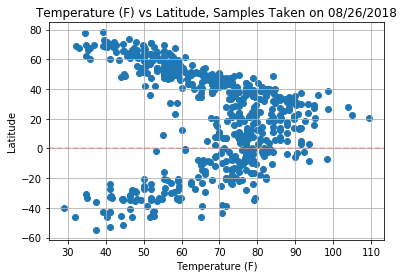

In [84]:
plt.scatter(cities_df['Temperature'], cities_df['Latitude'], marker="o")

plt.title("Temperature (F) vs Latitude, Samples Taken on 08/26/2018")
plt.ylabel("Latitude")
plt.xlabel("Temperature (F)")
plt.grid(True)
plt.axhline(0, color='r', ls='--', alpha = 0.25)
# Save the figure
plt.savefig("Temperature_vs_Latitude.png")

# Show plot
plt.show()

# Humidity (%) vs Latitude

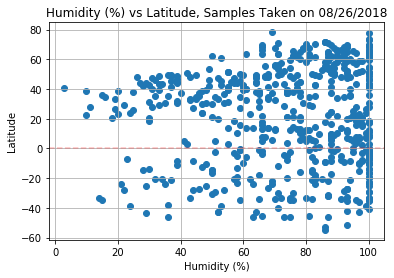

In [83]:
plt.scatter(cities_df['Humidity'], cities_df['Latitude'], marker="o")

plt.title("Humidity (%) vs Latitude, Samples Taken on 08/26/2018")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")
plt.grid(True)
plt.axhline(0, color='r', ls='--', alpha = 0.25)
# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

# Cloudiness (%) vs Latitude

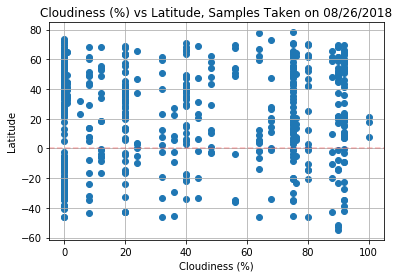

In [82]:
plt.scatter(cities_df['Cloudiness'], cities_df['Latitude'], marker="o")

plt.title("Cloudiness (%) vs Latitude, Samples Taken on 08/26/2018")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")
plt.grid(True)
plt.axhline(0, color='r', ls='--', alpha = 0.25)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

# Wind Speed (mph) vs Latitude

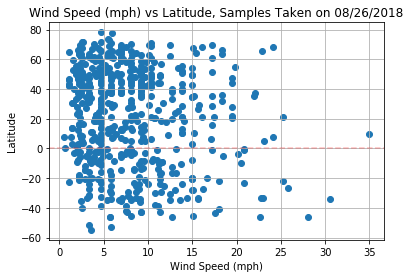

In [81]:
plt.scatter(cities_df['Wind Speed'], cities_df['Latitude'], marker="o")

plt.title("Wind Speed (mph) vs Latitude, Samples Taken on 08/26/2018")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (mph)")
plt.grid(True)
plt.axhline(0, color='r', ls='--', alpha = 0.25)
# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

In [75]:
cities_df.to_csv("cities.csv", encoding="utf-8", index=False)